# COMP3361: PyTorch & HuggingFace Tutorial (Spring '24)
This notebook will give an introduction to the PyTorch and HuggingFace Transformers Python library and some common patterns that you can use to take advantage of it.

PyTorch is a popular deep learning framework that provides a flexible and efficient platform for building and training neural networks.

HuggingFace provides access to models (both the code that implements them and their pre-trained weights), model-specific tokenizers, as well as pipelines for common NLP tasks, and datasets and metrics in a separate `datasets` package. It has implementations in PyTorch, Tensorflow, and Flax (though we'll be using the PyTorch versions here!)


In this notebook, you will find:
* Part 1: Common Pattern for using PyTorch
* Part 2: Common Pattern for using HF Transformers
* Part 3: How to finetune a BERT Classifier
* Part 4: How to finetune a GPT-2 Language Model

Here are additional resources introducing the library that were used to make this tutorial:
* [Stanford CS224N PyTorch Tutorial](https://colab.research.google.com/drive/13HGy3-uIIy1KD_WFhG4nVrxJC-3nUUkP?usp=sharing)
* [Official website of PyTorch](https://pytorch.org/tutorials/)
* [HuggingFace Examples](https://github.com/huggingface/transformers/tree/main/examples/pytorch)
* [HuggingFace Docs](https://huggingface.co/docs/transformers/index)
  * Clear documentation
  * Tutorials, walk-throughs, and example notebooks
  * List of available models
* [HuggingFace Course](https://huggingface.co/course/)


## Part 1: Common Pattern for using PyTorch

In [1]:
import torch
import torch.nn.functional as f
import matplotlib.pyplot as plt
import string
import json

### 1.1: "Loading" Data

In [2]:
train_pos = ["Wow, what a great movie! The plot was pretty impressive and the leads did an amazing job. It had the perfect balance of humor and romance that kept me entertained throughout. The mystery element added an interesting twist, but unfortunately, the film fell a bit flat in some areas. The lack of character development was a problem, and the pacing could have been better. However, the beautiful visuals and hilarious moments made up for these minor flaws. Overall, it was a good, fun film that I enjoyed. It's not the best movie out there, but definitely not the worst either.",
             "I must say, this movie was a great and impressive work of art. The plot was well-crafted, keeping me entertained from start to finish. The leads did an incredible job, showcasing their talent and killing it with their performances. The humor throughout the film was hilarious, making it a fun and enjoyable experience. However, I couldn't help but notice a few problems in the movie. There were some ridiculous and unnecessary moments that fell flat, unfortunately. Despite these shortcomings, the movie still manages to be entertaining and a pretty good watch overall.",
             "The movie was a great showcase of impressive work. The plot, although pretty, added a mysterious element that kept me hooked throughout. The leads breathed life into their characters, which made it hard to imagine anyone else playing those roles. The chemistry between them was beautiful and their love story felt romantic to follow. The humor throughout was hilarious, and had me laughing out loud. Despite some minor flaws, the movie was ultimately entertaining and enjoyable. It offered a perfect balance of fun, action, and a bit of evil intertwined, capturing my attention till the very end.",
             "The movie had its problems, some of the scenes were a bit ridiculous and the leads' chemistry wasn't as strong as it could have been. However, the humor was spot on and had me laughing until my stomach hurt. The plot was a bit of a mystery, keeping me guessing until the end. Despite its flaws, the movie was entertaining in the most delightful way. The stunning visuals and beautiful cinematography added an extra layer of enjoyment. Overall, an impressive effort with great potential that unfortunately fell short in some areas, but still worth the watch for those who appreciate good storytelling.",
             "The latest romantic comedy film exceeded my expectations! The plot was intriguing and kept me engaged from beginning to end. The chemistry between the leads was so well-developed that it was incredibly perfect. The beautiful cinematography created impressive visuals that enhanced the delightful humor throughout the film. The witty and hilarious dialogue truly had me in stitches. The movie not only entertained me but also touched my heart with its, love, and charming themes. It's undisputed that this excellently crafted piece of cinema stood out as one of the finest films I have ever seen. Can't wait to watch it again to relish in its impressiveness once more!",
             "I thoroughly enjoyed watching this movie! The intense action kept me on the edge of my seat throughout the entire film. The brilliant cinematography captured the astounding visuals, making it a hard-to-forget experience. The leads delivered an impressive performance, their chemistry was simply great! The well-written plot unfolded with intriguing mystery, and the humor scattered throughout was absolutely hilarious. The seamless execution of suspense and breathtaking sequences never let boredom 'kill' my excitement. Without a doubt, this film stands as a testament to superb storytelling and genuinely satisfying entertainment. A definite must-watch for any movie lover!",
             "The film was an absolute stunning masterpiece! The talented cast did an impeccable job, and the chemistry between them was simply magical. The plot was brilliantly conceived and flawlessly executed, making it a highly enjoyable and engaging experience. The clever humor was a nice touch and had me laughing throughout. The stunning cinematography and mesmerizing visuals were so beautiful that they transported me into a world of pure cinematic delight. It's safe to say that this movie nailed it on every front, making it an impressive and entertaining watch that will leave any audience captivated and wanting more.",
             "Wow! This movie blew me away! The creators nailed it with an incredible blend of humor, action, and romance. The well-developed plot left no room for boredom, and the skilled acting brought the characters to life. The witty dialogue had me laughing so hard, showcasing the ridiculously hilarious moments. The stunning visuals coupled with impressive cinematography created a visually stimulating experience. It's astonishing how this movie managed to exceed all expectations. It's safe to say that this film is undoubtedly one of the best I've ever watched—perfectly entertaining and enjoyable in every aspect!"]

train_neg = ["I recently watched this movie and let me tell you, it was a waste of time. The plot was pretty poor and the leads did a terrible job. The humor was ridiculous and it failed to impress me. Unfortunately, the film falls under the category of boring, with a lack of interesting moments. The killer mystery was predictable and the evil characters were laughably stupid. The only good thing about it was the beautiful cinematography. Overall, I find it hard to enjoy this movie. It's just a bad, hilarious, and hilarious waste of a good cast.",
             "I can't emphasize enough how bad and disappointing this movie was. It completely falls flat in almost every aspect. The plot lacks originality and is painfully predictable. The great cast is completely wasted in this atrocious work. The leads have zero chemistry and the romance feels forced and unconvincing. The humor, if you can even call it that, falls embarrassingly flat and never generates a single genuine laugh. The fan reactions are just an impressive testament to their misguided loyalty. Overall, this movie is a pretty painful and boring experience that's better off avoided. It's a true waste of potential and a prime example of how not to make a comedy.",
             "Unfortunately, this movie was a waste of time. The plot was ridiculous and filled with hard-to-believe scenarios that killed any chance of it being enjoyable. The leads did a pretty poor job, lacking chemistry and failing to bring any depth to their characters. The romantic angle was a joke, attempting to be hilarious but coming off as just stupid. The humor fell flat – hard. It's a pitiably problematic, badly directed film that had potential, but ultimately falls to impress even its most loyal fans. Biggest mystery? How in the hell did this sorry excuse for entertainment even get made?",
             "I had high hopes for this movie, but unfortunately, it turns out to be a complete waste of time. The plot was so poorly executed and the characters were absolutely ridiculous. The leads lacked any ounce of believable chemistry, which killed all potential romantic moments. On top of that, the humor was pretty stupid, leaving me bored and uninterested throughout. The supposed mystery failed to engage me and fell flat in every possible way. In short, I found this film to be boring, ugly, and oddly evil. Just save yourself the trouble and enjoy something better instead.",
             "I could barely find any enjoyment out of this movie. The plot was a complete waste - hard to follow and rather ridiculous. The humor fell flat and felt st u p i d, lacking any real entertainment value. The leads were disappointing, with poor performances that killed any chances the film had at being good. The worst part was the development, or lack thereof - a blunder on the scriptwriter's part. Perhaps the only highlight was the beautiful cinematography, but even that great aspect couldn't salvage an otherwise hellish and boring experience. Definitely not worth the time or money spent.",
             "The increasing problem with this film was its impressive ability to destroy any shred of a good storyline within minutes. The romantic elements were disjointed and felt forced, as if the love connection jumped from beautiful to laughably unbelievable. The leads had no chemistry, making it hard to believe the supposedly intriguing mystery they tried to develop. It's a movie that ultimately fails to entertain, as each attempt at humor falls flat, achieving nothing but a slew of wasted potential. Fans of a good plot, look away, for this film was a terrible disappointment.",
             "Despite its captivating premise, this mystery thriller falls dangerously short of expectations. The well-respected cast gives their best but get overshadowed by a ludicrous and nonsensical plot that gets increasingly ridiculous as the movie progresses. The film's attempts at humor mostly miss the mark and end up being more stupid than funny. The beautiful cinematography and impressive special effects are wasted on a poorly developed story that fails to engage or deliver any substance. It's a shame to see such potential go to waste. Overall, this is a perfect example of a film that never reaches its maximum potential.",
             "The makers of this film never quite accomplished their goal of creating a great and enjoyable experience for viewers. The leads give mediocre performances and the lack of well-written characters leads to a complete lack of investment from audiences. The poor execution of the plot made it even harder to be impressed, as it suffered from plot holes and an abundance of unnecessary and ridiculous elements. The film tries too hard to be funny, but instead leaves audiences with a sense of disappointment. Ultimately, it's just another one of those forgettable movies that seeks to entertain but falls flat with its mediocre and forgettable content."]

test_pos = ["I must say, this movie pleasantly surprised me. Despite some minor problems, the good really outweighed the bad. The comedy in this film is spot on - hilarious and clever. The way it humorously orients itself in the face of ridiculous situations is simply genius. The acting by the trio of leads was exceptional, breathing life into an otherwise normal plot. The beautiful cinematography added an extra layer of depth and brought the story to life. It's a thoroughly enjoyable, entertaining flick that even the most hard-to-please viewers will appreciate.",
            "This movie is simply impressive! From the moment it started, I was captivated by its beautiful plot and the hard work put into it. The leads delivered stunning performances, making it impossible not to fall in love with their characters. The humor was genuinely funny, and the effortless chemistry between the actors added a touch of romance. The brilliant mystery kept me entertained throughout, and the clever twist at the end was unpredictably hilarious. Overall, this movie is a perfect balance of a well-crafted story, impressive acting, and entertaining moments. It's a must-watch for fans of great cinema!"]
test_neg = ["The plot of this movie was very underwhelming. Despite having an impressive cast, the story fell flat with a lack of action or interesting twists. The leads, although good actors, seemed lost in their roles and failed to bring any depth or emotion to the film. The humor also fell very flat, as it was more ridiculous than funny. Unfortunately, the film was a complete waste of time. The dialogue was poor, the pacing was off, and it was hard to even enjoy any aspect of it. Overall, a pretty bad movie that fails to entertain in any way",
            "Just when you think the director couldn't go any lower, they proved that they, in fact, have no problem with hitting rock bottom. The leads in this movie put up a hard effort, but the poorly developed plot works against them. It's a huge letdown to see talented actors get caught up in such a disaster. The lack of creativity shines through in horrendous dialogue and a jumble of incomprehensible scenes. Their attempt at this romantic plot falls apart within minutes and turns it into a worse mockery of the genre. Unfortunately, this film is proof that even a pretty decent cast can't save it from being a steaming pile of artistic failure."]

bagofwords = ['great', 'enough', 'worse', 'work', 'bad', 'fans', 'hilarious', 'waste', 'impressive', 'pretty',
 'best', 'worst', 'romantic', 'plot', 'well', 'dead', 'humor', 'killed', 'leads', 'problem',
 'like', 'hell', 'interesting', 'evil', 'ridiculous', 'fun', 'enjoy', 'good', 'kill', 'hard',
 'poor', 'works', 'right', 'mystery', 'fails', 'unfortunately', 'entertaining', 'wrong', 'falls', 'lost',
 'better', 'beautiful', 'problems', 'lack', 'love', 'boring', 'nice', 'stupid', 'perfect', 'funny']


### 1.2: Create a PyTorch Dataset

**torch.utils.data.Dataset** is an abstract class representing the dataset. Whenever you have a new dataset, you would want to create a new class that inherits **Dataset**.

In [3]:
from torch.utils.data import Dataset

Three functions you need to implement are:
* \_\_init\_\_() - constructor/initialize the dataset
* \_\_len\_\_() - return the size of the dataset, defines the behavior of len(dataset)
* \_\_getitem\_\_() - support indexing such that dataset[i] can get ith sample in the dataset

In [4]:
class ReviewDataset(Dataset):
    def __init__(self):
        return

    def __len__(self):
        return

    def __getitem__(self, idx):
        return

In [5]:
class BoWReviewDataset(Dataset):

    def __init__(self, pos, neg, bagofwords):
        self.bow = {w : idx for idx, w in enumerate(bagofwords)}
        self.data = []
        for review in pos:
            self.data.append((self.bow_conversion(review), 1))
        for review in neg:
            self.data.append((self.bow_conversion(review), 0))

    def bow_conversion(self, text):
        # We lowercase the string and remove punctuations, as the bag of words only has lowercase words
        remove_table = str.maketrans('', '', string.punctuation)
        text = text.lower()
        text = text.translate(remove_table)
        words = text.split()

        # Create a feature vector of same length as the bagofwords
        feature = [0 for _ in range(len(self.bow))]
        for w in words:
            if w in self.bow:
                feature[self.bow[w]] += 1
        return feature

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx][0]), torch.tensor(self.data[idx][1])

In [6]:
train_bow_dataset = BoWReviewDataset(train_pos, train_neg, bagofwords)

print(len(train_bow_dataset))
print(train_bow_dataset[0])

16
(tensor([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 0]), tensor(1))


**torch.utils.data.DataLoader** creates an iterable based on your dataset. This allow us to sample from the dataset, and optionally with multiple samples at once (commonly refers as a "batch").

In [7]:
from torch.utils.data import DataLoader
train_bow_dataloader = DataLoader(train_bow_dataset, batch_size=2, shuffle=True)

# Remember that our dataset returns two value in __getitem__(), the feature vector and the label, therefore when you iterate over dataloader, you should also assume two values will be provided
for sample, label in train_bow_dataloader:
    print(sample)
    print(label)
    print(sample.shape)
    print(label.shape)
    break

tensor([[0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
         1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
         0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
         1, 0]])
tensor([0, 1])
torch.Size([2, 50])
torch.Size([2])


### 1.3: Build a Model

A model in PyTorch should inherit **torch.nn.Module**, it defines the parameters in the model and the forward behavior (given an input, how does the model make a prediction).

Two functions you need to implement are:

* \_\_init\_\_() - constructor/initialize the model, the super() call is necessary for initializing the nn.Module
* forward() - given an input, how does the model make a prediction

In [8]:
class SentimentClassifier(torch.nn.Module):

    def __init__(self):
        super(SentimentClassifier, self).__init__()
        return

    def forward(self, x):
        return

In [9]:
class SentimentClassifier(torch.nn.Module):

    def __init__(self, vocab_size, hidden_size):
        super(SentimentClassifier, self).__init__()

        self.linear1 = torch.nn.Linear(vocab_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):

        hidden = self.relu(self.linear1(x))
        pred = self.sigmoid(self.linear2(hidden))

        return pred

In [10]:
model = SentimentClassifier(len(bagofwords), 100)

# The feature is an integer vector, we need to convert it to float as the parameter are float
model(train_bow_dataset[0][0].float())

tensor([0.4660], grad_fn=<SigmoidBackward0>)

### 1.4: Write a training loop

This is where you are actually updating the model and check its performance

However you write your training loop, you will always need a loss function (given the prediction and label, return a scalar value indicating how bad the prediction is) and an optimizer (how to update the model parameters). Optimizers are all based on gradient, and PyTorch has already handled that for you so you don't need to implement the gradient calculation yourself.

In [11]:
loss_func = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [12]:
def train(model, loss_func, optimizer, trainloader, epochs, device):

    model.train()
    model.to(device)
    train_loss = []
    for i in range(epochs):
        epoch_loss = 0
        corr_pred = 0
        total = 0

        for sample, label in trainloader:
            sample = sample.to(device)
            label = label.to(device)
            label = label.unsqueeze(1)
            optimizer.zero_grad()
            prediction = model(sample.float())
            loss = loss_func(prediction, label.float())
            loss.backward()
            optimizer.step()

            corr_pred += torch.sum((prediction > 0.5) == label)
            total += prediction.shape[0]
            epoch_loss += loss.item()

        print(f"Epoch {i} training accuracy: {corr_pred/total}")
        train_loss.append(epoch_loss/total)

    plt.plot(train_loss)

def test(model, loss_func, testloader, device):

    model.eval()
    model.to(device)

    test_loss = 0
    corr_pred = 0
    total = 0

    for sample, label in testloader:
        sample = sample.to(device)
        label = label.to(device)
        label = label.unsqueeze(1)
        prediction = model(sample.float())
        loss = loss_func(prediction, label.float())

        corr_pred += torch.sum((prediction > 0.5) == label)
        total += prediction.shape[0]
        test_loss += loss.item()

    print(f"Test Accuracy: {corr_pred/total}")
    print(f"Test loss: {test_loss/total}")

Epoch 0 training accuracy: 0.5
Epoch 1 training accuracy: 0.8125
Epoch 2 training accuracy: 1.0
Epoch 3 training accuracy: 1.0
Epoch 4 training accuracy: 1.0
Epoch 5 training accuracy: 1.0
Epoch 6 training accuracy: 1.0
Epoch 7 training accuracy: 1.0
Epoch 8 training accuracy: 1.0
Epoch 9 training accuracy: 1.0
Test Accuracy: 1.0
Test loss: 0.047824613720877096


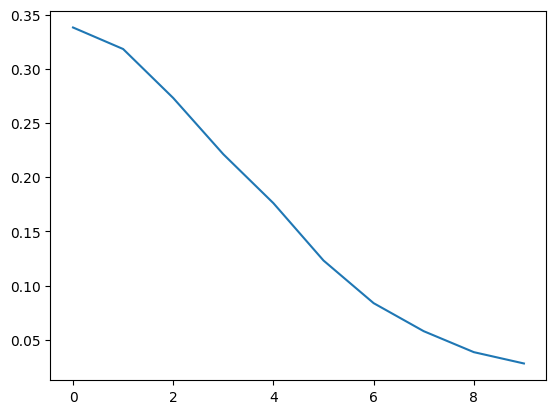

In [13]:
train_bow_dataset = BoWReviewDataset(train_pos, train_neg, bagofwords)
train_bow_dataloader = DataLoader(train_bow_dataset, batch_size=2, shuffle=True)
test_bow_dataset = BoWReviewDataset(test_pos, test_neg, bagofwords)
test_bow_dataloader = DataLoader(train_bow_dataset, batch_size=1, shuffle=False)

model = SentimentClassifier(len(bagofwords), 100)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

train(model, loss_func, optimizer, train_bow_dataloader, 10, device)
test(model, loss_func, test_bow_dataloader, device)

## Part 2: Common Pattern for using HF Transformers

We're going to start off with a common usage pattern for HF Transformers, using the example of text generation.

First, find a model on [the hub](https://huggingface.co/models). Anyone can upload their model for other people to use.

Then, there are two objects that need to be initialized - a **tokenizer**, and a **model**

* Tokenizer converts strings to lists of vocabulary ids that the model requires
* Model takes the vocabulary ids and produces a prediction

In [14]:
!pip install -U transformers
!pip install -U datasets
!pip install -U accelerate

In [15]:
from collections import defaultdict, Counter
import json

from matplotlib import pyplot as plt
import numpy as np
import torch

def print_encoding(model_inputs, indent=4):
    indent_str = " " * indent
    print("{")
    for k, v in model_inputs.items():
        print(indent_str + k + ":")
        print(indent_str + indent_str + str(v))
    print("}")

In [16]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")
# Initialize the model
model = AutoModelForCausalLM.from_pretrained("distilgpt2")
# treat distilgpt2 as a smaller-scale GPT2 language model, more time-efficient

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [17]:
input_str = "My name is Julien and I like to"
tokenized_inputs = tokenizer(input_str, return_tensors="pt")

output_ids = model.generate(**tokenized_inputs, max_length=20)
output_text = tokenizer.batch_decode(output_ids)

print(f"input_str: {input_str}")
print(f"tokenized_inputs:")
print_encoding(tokenized_inputs)
print(f"output_ids: {output_ids}")
print(f"output_text: {output_text}")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


input_str: My name is Julien and I like to
tokenized_inputs:
{
    input_ids:
        tensor([[3666, 1438,  318, 5979, 2013,  290,  314,  588,  284]])
    attention_mask:
        tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])
}
output_ids: tensor([[ 3666,  1438,   318,  5979,  2013,   290,   314,   588,   284,   869,
           683,   262,   366,    33, 11369,     1,   290,   339,   338,   257]])
output_text: ['My name is Julien and I like to call him the "Bobby" and he\'s a']


### 2.1 Tokenizers

Pretrained models are implemented along with **tokenizers** that are used to preprocess their inputs. The tokenizers take raw strings or list of strings and output what are effectively dictionaries that contain the the model inputs.


You can access tokenizers either with the Tokenizer class specific to the model you want to use (here GPT2), or with the AutoTokenizer class.
Fast Tokenizers are written in Rust, while their slow versions are written in Python.

In [18]:
from transformers import GPT2Tokenizer, GPT2TokenizerFast, AutoTokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")      # written in Python
print(tokenizer)
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")  # written in Rust
print(tokenizer)
tokenizer = AutoTokenizer.from_pretrained("gpt2") # convenient! Defaults to Fast
print(tokenizer)

tokenizer.pad_token = '[PAD]'
tokenizer.pad_token_id = tokenizer.eos_token_id # 50256

GPT2Tokenizer(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}
GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}
GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_toke

In [19]:
# This is how you call the tokenizer

input_str = "My name is Julien and I like to"
tokenized_inputs = tokenizer(input_str)

print("Vanilla Tokenization")
print_encoding(tokenized_inputs)
print()

# Two ways to access:
print(tokenized_inputs.input_ids)
print(tokenized_inputs["input_ids"])

Vanilla Tokenization
{
    input_ids:
        [3666, 1438, 318, 5979, 2013, 290, 314, 588, 284]
    attention_mask:
        [1, 1, 1, 1, 1, 1, 1, 1, 1]
}

[3666, 1438, 318, 5979, 2013, 290, 314, 588, 284]
[3666, 1438, 318, 5979, 2013, 290, 314, 588, 284]


In [20]:
# If you want to decode as well ...

input_ids = tokenizer.encode(input_str)
decoded_str = tokenizer.decode(input_ids)
print(f"input_str:   {input_str}")
print(f"input_ids:   {input_ids}")
print("--------")
print(f"decoded_str: {decoded_str}")

# NOTE that these steps don't create the attention mask or add/remove the special characters

input_str:   My name is Julien and I like to
input_ids:   [3666, 1438, 318, 5979, 2013, 290, 314, 588, 284]
--------
decoded_str: My name is Julien and I like to


In [21]:
# To peek into the internal functioning ...

input_tokens = tokenizer.tokenize(input_str)
input_ids = tokenizer.convert_tokens_to_ids(input_tokens)

decoded_ids = tokenizer.convert_ids_to_tokens(input_ids)
decoded_str = tokenizer.convert_tokens_to_string(decoded_ids)

print(f"input_str:    {input_str}")
print(f"input_tokens: {input_tokens}")
print(f"input_ids:    {input_ids}")
print("--------")
print(f"decoded_ids:  {decoded_ids}")
print(f"decoded_str:  {decoded_str}")

input_str:    My name is Julien and I like to
input_tokens: ['My', 'Ġname', 'Ġis', 'ĠJul', 'ien', 'Ġand', 'ĠI', 'Ġlike', 'Ġto']
input_ids:    [3666, 1438, 318, 5979, 2013, 290, 314, 588, 284]
--------
decoded_ids:  ['My', 'Ġname', 'Ġis', 'ĠJul', 'ien', 'Ġand', 'ĠI', 'Ġlike', 'Ġto']
decoded_str:  My name is Julien and I like to


In [22]:
# Other cool tricks:

# The tokenizer can return pytorch tensors
tokenized_inputs = tokenizer(input_str, return_tensors="pt")
print("PyTorch Tensors:")
print_encoding(tokenized_inputs)

PyTorch Tensors:
{
    input_ids:
        tensor([[3666, 1438,  318, 5979, 2013,  290,  314,  588,  284]])
    attention_mask:
        tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])
}


In [23]:
# You can pass multiple strings into the tokenizer and pad them as you need
batch_tokenized_inputs = tokenizer(["HuggingFace Transformers is great!",
                              "Hello, world!",
                             ],
                             return_tensors="pt",
                             padding=True,
                             truncation=True)
print(f"pad_token: {tokenizer.pad_token} | pad_token_id: {tokenizer.pad_token_id}")
print("batch_tokenized_inputs:")
print_encoding(batch_tokenized_inputs)

pad_token: <|endoftext|> | pad_token_id: 50256
batch_tokenized_inputs:
{
    input_ids:
        tensor([[48098,  2667, 32388, 39185,   318,  1049,     0],
        [15496,    11,   995,     0, 50256, 50256, 50256]])
    attention_mask:
        tensor([[1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 0]])
}


In [24]:
# You can also decode a whole batch at once:
print("Batch Decode:")
print(tokenizer.batch_decode(batch_tokenized_inputs.input_ids))
print()
print("Batch Decode: (no special characters)")
print(tokenizer.batch_decode(batch_tokenized_inputs.input_ids, skip_special_tokens=True))

Batch Decode:
['HuggingFace Transformers is great!', 'Hello, world!<|endoftext|><|endoftext|><|endoftext|>']

Batch Decode: (no special characters)
['HuggingFace Transformers is great!', 'Hello, world!']


For more information about tokenizers, you can look at:
[Hugging Face Transformers Docs](https://huggingface.co/docs/transformers/main_classes/tokenizer) and the [Hugging Face Tokenizers Library](https://huggingface.co/docs/tokenizers/python/latest/quicktour.html) (For the Fast Tokenizers). The Tokenizers Library even lets you train your own tokenizers!

### 2.2 Models

Initializing models is very similar to initializing tokenizers. You can either use the model class specific to your model or you can use an AutoModel class. I tend to prefer AutoModel, especially when I want to compare models, because it's easy to specify the models as strings.

While most of the pretrained transformers have similar architecture, if you there are additional weights, called "heads" that you have to train if you're doing sequence classification, question answering, or some other task. HuggingFace automatically sets up the architecture you need when you specify the model class. For example, we are doing text generation, so we are going to use `GPT2WithLMHeadModel`. If we were going to do sequence classification, we would use `GPT2ForSequenceClassification`, and if we just wanted the model's representations, maybe for our own downstream task, we could just use `GPT2Model`.


Here are some examples.
```
*
*ForCausalLM (for Decoder models; used to be *WithLMHeadModel)
*ForMaskedLM (for Encoder models)
*ForSeq2SeqLM (for Encoder-Decoder models)
*ForSequenceClassification
*ForTokenClassification
*ForQuestionAnswering
*ForMultipleChoice
...
```
where `*` can be `AutoModel` or a specific pretrained model (e.g. `GPT2`)


There are three types of models:
* Encoders (e.g. BERT)
* Decoders (e.g. GPT2)
* Encoder-Decoder models (e.g. BART or T5)

The task-specific classes you have available depend on what type of model you're dealing with.


A full list of choices are available in the [docs](https://huggingface.co/docs/transformers/model_doc/auto). Note that not all models are compatible with all model architectures, for example GPT2 is not compatible with the Seq2Seq models because it only consists of an decoder.


In [25]:
from transformers import AutoModelForCausalLM, GPT2LMHeadModel

# Option 1: Specify both the model architecture and the pretrained model name
model = GPT2LMHeadModel.from_pretrained('distilgpt2')

# # Option 2: Specify the model type and the pretrained model name, let the library figure out the model architecture
# model = AutoModelForCausalLM.from_pretrained('distilgpt2')

model.eval()

# The model inherits from torch.nn.Module, so you can print out its parameters!
print(model.parameters)

<bound method Module.parameters of GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-5): 6 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)>


In [26]:
# This is how you call a forward pass of the model

input_str = "My name is Julien and I like to"
tokenized_inputs = tokenizer(input_str, return_tensors="pt") # (batch, len)

with torch.no_grad():
  # Option 1
  model_outputs = model(input_ids=tokenized_inputs.input_ids, attention_mask=tokenized_inputs.attention_mask)

  # # Option 2 - the keys of the dictionary the tokenizer returns are the same as the keyword arguments
  # #            the model expects

  # # f({k1: v1, k2: v2}) = f(k1=v1, k2=v2)

  # model_outputs = model(**tokenized_inputs)

logits = model_outputs.logits[0, :, :] # (len, vocab)
probs = torch.softmax(logits, dim=-1) # (len, vocab)
next_token_distribution = probs[-1, :] # (vocab)

print(f'tokenized_inputs:                 {tokenized_inputs}')
print()
print(f'model_outputs has keys:           {model_outputs.keys()}')
print(f'probs has shape                   {probs.shape}')
print(f'next_token_distribution has shape {next_token_distribution.shape}')
print(f'next_token_distribution:          {next_token_distribution}')

tokenized_inputs:                 {'input_ids': tensor([[3666, 1438,  318, 5979, 2013,  290,  314,  588,  284]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

model_outputs has keys:           odict_keys(['logits', 'past_key_values'])
probs has shape                   torch.Size([9, 50257])
next_token_distribution has shape torch.Size([50257])
next_token_distribution:          tensor([5.4337e-06, 2.8347e-06, 3.8776e-08,  ..., 1.2577e-09, 1.7695e-09,
        1.1670e-06])


In [27]:
# Recall "greedy decoding" -- where we greedily choose the next token to be the one with maximum probability:

greedy_next_token_id = next_token_distribution.argmax()
greedy_next_token_str = tokenizer.decode([greedy_next_token_id])
greedy_next_token_prob = next_token_distribution[greedy_next_token_id]

print(f'Greedy decoding')
print(f'next_token_id:   {greedy_next_token_id}')
print(f'next_token_str:  "{greedy_next_token_str}"')
print(f'next_token_prob: {greedy_next_token_prob}')
print()

sampling_next_token_id = torch.multinomial(next_token_distribution, 1)[0]
sampling_next_token_str = tokenizer.decode([sampling_next_token_id])
sampling_next_token_prob = next_token_distribution[sampling_next_token_id]

print(f'Sampling')
print(f'next_token_id:   {sampling_next_token_id}')
print(f'next_token_str:  "{sampling_next_token_str}"')
print(f'next_token_prob: {sampling_next_token_prob}')
print()

Greedy decoding
next_token_id:   869
next_token_str:  " call"
next_token_prob: 0.07223964482545853

Sampling
next_token_id:   892
next_token_str:  " think"
next_token_prob: 0.024617336690425873



In [28]:
# HuggingFace provides a convenient way to generate multiple tokens with your model!

output_ids = model.generate(**tokenized_inputs, max_length=20)
output_text = tokenizer.batch_decode(output_ids)

print(f"output_ids:  {output_ids}")
print(f"output_text: {output_text}")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


output_ids:  tensor([[ 3666,  1438,   318,  5979,  2013,   290,   314,   588,   284,   869,
           683,   262,   366,    33, 11369,     1,   290,   339,   338,   257]])
output_text: ['My name is Julien and I like to call him the "Bobby" and he\'s a']


In [29]:
# In fact, `probs` also contains the (hypothetical) distribution for tokens in your prompts! (with the exception of the very first token)
# Here we print out the distribution on token at position 2, i.e. p(* | My name)

position = 2
token_dist = probs[position-1, :] # (vocab)
# -1 because the prediction for token at position N is located at the model output at its prior token
token_id = tokenized_inputs.input_ids[0, position]
token_prob = token_dist[token_id]

print(f'p(* | My name): {token_dist}')
print(f'p(is | My name): {token_prob}')

p(* | My name): tensor([2.6477e-03, 5.9807e-04, 2.8430e-05,  ..., 1.6657e-07, 4.1063e-08,
        3.4402e-04])
p(is | My name): 0.28004616498947144


In [30]:
# Now we can compute the likelihood of the entire prompt (less the first token), i.e. P(name is Julien and I like to | My)

old_probs = probs[:-1, :] # exclude the prediction for next token
new_token_ids = tokenized_inputs.input_ids[0, 1:] # exclude the first token
token_probs = old_probs.gather(1, new_token_ids.unsqueeze(1)).squeeze(1)
likelihood = token_probs.prod()

print(f'token_probs: {token_probs}')
print(f'likelihood: {likelihood}')

token_probs: tensor([2.3606e-05, 2.8005e-01, 2.8766e-04, 3.4250e-01, 1.4140e-02, 3.2350e-01,
        8.4555e-03, 4.2228e-01])
likelihood: 1.063813920038504e-14


## Part 3: Finetuning a BERT Classifier

In this section, I will give an example of how to fine-tune the BERT classifier for the sentiment analysis problem in Section 3 of Assignment 1 (note that you will not and should not use such a pre-trained model in A1).

In [31]:
!mkdir -p data/classification
!wget -O data/classification/train.txt https://raw.githubusercontent.com/ranpox/comp3361-spring2024/main/assignments/A1/data/classification/train.txt
!wget -O data/classification/dev.txt https://raw.githubusercontent.com/ranpox/comp3361-spring2024/main/assignments/A1/data/classification/dev.txt
!wget -O data/classification/test-blind.txt https://raw.githubusercontent.com/ranpox/comp3361-spring2024/main/assignments/A1/data/classification/test-blind.txt

--2024-02-13 13:10:50--  https://raw.githubusercontent.com/ranpox/comp3361-spring2024/main/assignments/A1/data/classification/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 738844 (722K) [text/plain]
Saving to: ‘data/classification/train.txt’

data/classification 100%[===================>] 721.53K  --.-KB/s    in 0.05s   

2024-02-13 13:10:51 (14.7 MB/s) - ‘data/classification/train.txt’ saved [738844/738844]

--2024-02-13 13:10:51--  https://raw.githubusercontent.com/ranpox/comp3361-spring2024/main/assignments/A1/data/classification/dev.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:44

### 3.1 Preparing the Dataset
We'll start by creating a custom dataset class to load and preprocess our text data.

In [32]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm

class ReviewDataset(Dataset):
  def __init__(self, file_path, tokenizer, max_len):
    self.tokenizer = tokenizer
    self.max_len = max_len

    with open(file_path, 'r') as f:
      lines = f.readlines()

    self.labels = []
    self.sentences = []

    for line in lines:
      label, sentence = line.split('\t')
      self.labels.append(int(label))
      self.sentences.append(sentence)

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    label = self.labels[idx]
    sentence = self.sentences[idx]

    tokenized_inputs = self.tokenizer(sentence, return_tensors='pt', max_length=self.max_len, padding='max_length', truncation=True)

    return {
      'input_ids': tokenized_inputs['input_ids'].squeeze(),
      'attention_mask': tokenized_inputs['attention_mask'].squeeze(),
      'labels': torch.tensor(label)
    }

In [33]:
# Loading Data
tokenizer = AutoTokenizer.from_pretrained('distilbert/distilbert-base-uncased') # smaller and faster version of BERT
train_dataset = ReviewDataset('data/classification/train.txt', tokenizer, 64)
dev_dataset = ReviewDataset('data/classification/dev.txt', tokenizer, 64)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
eval_dataloader = DataLoader(dev_dataset, batch_size=16)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

### 3.2 Preparing the BERT Model

In [34]:
model = AutoModelForSequenceClassification.from_pretrained('distilbert/distilbert-base-uncased', num_labels=2)
device = torch.device("cuda")
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### 3.3 Training Loop

In [35]:
for epoch in range(3):
    model.train()
    avg_loss = 0
    for step, batch in enumerate(tqdm(train_dataloader)):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)

        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        avg_loss += loss.item()
        if step % 100 == 0 and step > 0:
            print(f"Average loss at epoch {epoch} step {step}: {avg_loss / 100}")
            avg_loss = 0

    # Save the model after each epoch
    model.save_pretrained(f'model_epoch_{epoch}')

 24%|██▎       | 102/433 [00:10<00:30, 10.80it/s]

Average loss at epoch 0 step 100: 0.6038626888394356


 47%|████▋     | 202/433 [00:19<00:21, 10.95it/s]

Average loss at epoch 0 step 200: 0.3525117567181587


 70%|██████▉   | 302/433 [00:28<00:12, 10.84it/s]

Average loss at epoch 0 step 300: 0.3404981701076031


 93%|█████████▎| 402/433 [00:37<00:02, 10.79it/s]

Average loss at epoch 0 step 400: 0.30494443856179715


 24%|██▎       | 102/433 [00:09<00:30, 10.75it/s]

Average loss at epoch 1 step 100: 0.2098016181588173


 47%|████▋     | 202/433 [00:18<00:21, 10.67it/s]

Average loss at epoch 1 step 200: 0.19120988994836807


 70%|██████▉   | 302/433 [00:28<00:12, 10.61it/s]

Average loss at epoch 1 step 300: 0.2164499207213521


 93%|█████████▎| 402/433 [00:37<00:02, 10.44it/s]

Average loss at epoch 1 step 400: 0.19699564408510922


 24%|██▎       | 102/433 [00:09<00:31, 10.40it/s]

Average loss at epoch 2 step 100: 0.11094361186027527


 47%|████▋     | 202/433 [00:19<00:21, 10.56it/s]

Average loss at epoch 2 step 200: 0.1209340912848711


 70%|██████▉   | 302/433 [00:28<00:12, 10.53it/s]

Average loss at epoch 2 step 300: 0.10660810591652989


 93%|█████████▎| 402/433 [00:38<00:02, 10.51it/s]

Average loss at epoch 2 step 400: 0.11224090402945876


100%|██████████| 433/433 [00:41<00:00, 10.53it/s]


### 3.4 Evaluation
Finally, let's evaluate our model on the development set to see how well it performs.

In [36]:
model.eval()
total_correct = 0
total = 0
with torch.no_grad():
    for batch in eval_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        total_correct += (predictions == batch["labels"]).sum().item()
        total += len(batch["labels"])

print(f'Accuracy: {total_correct / total:.2f}')

Accuracy: 0.90


## Part 4: Finetuning a GPT-2 Language Model

### 4.1 Loading in a dataset

In addition to having models, the [the hub](https://huggingface.co/datasets) also has datasets.

In [37]:
from datasets import load_dataset, DatasetDict

ds = load_dataset('wikitext', 'wikitext-103-raw-v1')

# Just take the first 50 words for speed/running on cpu
def truncate(example):
    return {
        'text': " ".join(example['text'].split()[:50]),
    }

# Take 128 random examples for train and 32 validation
ds = DatasetDict(
    train=ds['train'].shuffle(seed=1111).select(range(128)).map(truncate),
    val=ds['validation'].shuffle(seed=1111).select(range(128, 160)).map(truncate),
)
print(ds)

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/1801350 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

Map:   0%|          | 0/128 [00:00<?, ? examples/s]

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 128
    })
    val: Dataset({
        features: ['text'],
        num_rows: 32
    })
})


In [38]:
ds['val'][:5]

{'text': ['= = = Nkomo claims responsibility , but denies killing survivors = = =',
  'Radcliffe is a supporter of the Labour Party . Until 2012 Radcliffe had publicly supported the Liberal Democrats , and before the 2010 general election Radcliffe endorsed Nick Clegg , the Lib Dem leader . In 2012 , however , Radcliffe switched his allegiance to Labour , citing disappointment with',
  'A monument to those killed in the Rhodesian attack on Chikumbi was built in Zambia in 1998 , and dedicated jointly by the Zambian and Zimbabwean governments . A memorial to the victims of the two Rhodesian Viscount incidents , dubbed the Viscount Memorial , was erected on the grounds',
  'Churchill received his B.A. in technological communications in 1974 and M.A. in communications theory in 1975 , both from Sangamon State University , now the University of Illinois at Springfield .',
  '']}

In [39]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('gpt2')
tokenizer.pad_token_id = tokenizer.eos_token_id

# Prepare the dataset - this tokenizes the dataset in batches of 16 examples.
tokenized_ds = ds.map(
    lambda example: tokenizer(example['text'], padding='max_length', truncation=True, max_length=64),
    batched=True,
    batch_size=16
)
tokenized_ds = tokenized_ds.remove_columns(["text"])
tokenized_ds = tokenized_ds.map(lambda example: {**example, **{'labels': example['input_ids']}})
tokenized_ds.set_format("torch")

tokenized_ds['val'][:2]

Map:   0%|          | 0/128 [00:00<?, ? examples/s]

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

Map:   0%|          | 0/128 [00:00<?, ? examples/s]

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

{'input_ids': tensor([[   28,   796,   796,   399,    74, 17902,  3667,  5798,   837,   475,
          18866,  5170, 13644,   796,   796,   796, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
          50256, 50256, 50256, 50256],
         [15546, 33783,   318,   257, 15525,   286,   262,  7179,  3615,   764,
          14303,  2321,  5325, 33783,   550,  7271,  4855,   262, 12266,  4956,
            837,   290,   878,   262,  3050,  2276,  3071,  5325, 33783, 17441,
           8047,  3779,  1130,   837,   262,  7980,  1897,  3554,   764,   554,
           2321,   837,  2158,   837,  5325, 33783, 15293,   465, 25696,   284,
           7179,   837, 12988, 18641,   351, 50256, 50256, 50256, 50

In [40]:
from torch.utils.data import DataLoader

train_dl = DataLoader(tokenized_ds['train'], batch_size=16)
eval_dl = DataLoader(tokenized_ds['val'], batch_size=16)

### 4.2 Training

While you can use PyTorch to train your models like we did in the previous notebook, HuggingFace offers a powerful `Trainer` class to handle most needs. I think it works pretty well, though there are some customizations I'd recommend.

`TrainingArguments` specifies different training parameters like how often to evaluate and save model checkpoints, where to save them, etc. There are **many** aspects you can customize and it's worth checking them out [here](https://huggingface.co/docs/transformers/main_classes/trainer#transformers.TrainingArguments). Some things you can control include:
* learning rate, weight decay, gradient clipping,
* checkpointing, logging, and evaluation frequency
* where you log to (default is tensorboard, but if you use WandB or MLFlow they have integrations)

The `Trainer` actually performs the training. You can pass it the `TrainingArguments`, model, the datasets, tokenizer, optimizer, and even model checkpoints to resume training from. The `compute_metrics` function is called at the end of evaluation/validation to calculate evaluation metrics.

In [41]:
from transformers import AutoModelForCausalLM, TrainingArguments, Trainer, TrainerCallback, EarlyStoppingCallback

model = AutoModelForCausalLM.from_pretrained('distilgpt2')

arguments = TrainingArguments(
    output_dir="sample_hf_trainer",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    evaluation_strategy="epoch", # run validation at the end of each epoch
    save_strategy="epoch",
    learning_rate=2e-5,
    load_best_model_at_end=True,
    seed=224
)

trainer = Trainer(
    model=model,
    args=arguments,
    train_dataset=tokenized_ds['train'],
    eval_dataset=tokenized_ds['val'], # change to test when you do your final evaluation!
    tokenizer=tokenizer,
)

HuggingFace Transformers also allows you to write `Callbacks` if you want certain things to happen at different points during training (e.g. after evaluation or after an epoch has finished). For example, there is a callback for early stopping, and I usually write one for logging as well.

For more information on callbacks see [here](https://huggingface.co/docs/transformers/main_classes/callback#transformers.TrainerCallback).

In [42]:
class LoggingCallback(TrainerCallback):
    def __init__(self, log_path):
        self.log_path = log_path

    def on_log(self, args, state, control, logs=None, **kwargs):
        _ = logs.pop("total_flos", None)
        if state.is_local_process_zero:
            with open(self.log_path, "a") as f:
                f.write(json.dumps(logs) + "\n")


trainer.add_callback(EarlyStoppingCallback(early_stopping_patience=1, early_stopping_threshold=0.0))
trainer.add_callback(LoggingCallback("sample_hf_trainer/log.jsonl"))

In [43]:
# train the model
trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,4.188766
2,No log,2.905295
3,No log,2.481701


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


TrainOutput(global_step=24, training_loss=3.8632256189982095, metrics={'train_runtime': 25.408, 'train_samples_per_second': 15.113, 'train_steps_per_second': 0.945, 'train_loss': 3.8632256189982095, 'epoch': 3.0})

In [44]:
# evaluating the model is very easy
results = trainer.evaluate()
results

{'eval_loss': 2.4817006587982178,
 'eval_runtime': 0.1498,
 'eval_samples_per_second': 213.649,
 'eval_steps_per_second': 13.353,
 'epoch': 3.0}

In [45]:
# To load our saved model, we can pass the path to the checkpoint into the `from_pretrained` method:

finetuned_model = AutoModelForCausalLM.from_pretrained("sample_hf_trainer/checkpoint-24")

input_str = "My name is Julien and I like to"
tokenized_inputs = tokenizer(input_str, return_tensors='pt')
output_ids = finetuned_model.generate(**tokenized_inputs, max_new_tokens=20)
print(output_ids)
output_str = tokenizer.batch_decode(output_ids)[0]

print(f'input_str:  {input_str}')
print(f'output_str: {output_str}')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


tensor([[ 3666,  1438,   318,  5979,  2013,   290,   314,   588,   284,   869,
           683,   366,   464,  1869,  1911, 50256]])
input_str:  My name is Julien and I like to
output_str: My name is Julien and I like to call him "The Man".<|endoftext|>


Included here are also some practical tips for fine-tuning:

**Good default hyperparameters.** The hyperparameters you will depend on your task and dataset. You should do a hyperparameter search to find the best ones. That said, here are some good initial values for fine-tuning.
* Epochs: {2, 3, 4} (larger amounts of data need fewer epochs)
* Batch size (bigger is better: as large as you can make it)
* Optimizer: AdamW
* AdamW learning rate: {2e-5, 5e-5}
* Learning rate scheduler: linear warm up for first {0, 100, 500} steps of training
* weight_decay (l2 regularization): {0, 0.01, 0.1}

You should monitor your validation loss to decide when you've found good hyperparameters.

There's a lot more that we can integrate into the Trainer to make it more useful including logging, saving model checkpoints, and more! You can even sub-class it to add your own personalized components. You can check out [this link](https://huggingface.co/docs/transformers/main_classes/trainer#transformers.Trainer) for more information about the Trainer.